**Background subtraction is a vital and highly useful step in many computer vision applications. Few of the popular uses are:**

**1. Remove moving objects from stationary background in a video**

**2. Removing green screen background for adding different background effects.**

In this miniproject, we approach background subtraction by the method of colour-clusters separation. At first, we assume that we have a high contrast image which distinctly separates background with the foreground. Second, we assume that intensity levels of each colour fit a Gaussian distribution. Using these assumptions, we can model a Gaussian mixture on the image to cluster the colours and then separate them.

**Steps considered:**
1. We separate three channels of the 3D image (RGB) to get 2D images
2. We fit GMM on each separate channels considering only two clusters in our image
3. We calculate the average value of gaussian means of both clusters for all channels separately, this is the threshold
4. We create a mask for foreground image by filtering out only those pixels which have a value above or below the threshold
5. We then apply this mask on the image by multiplying pixel-to-pixel for all the channels separately
6. Finally, we concatenate all the channels to get our final 3D image with background removed/subtracted.

**Below fill in the blocks with correct code to complete the MiniProject.**


## Import Library and display the Image

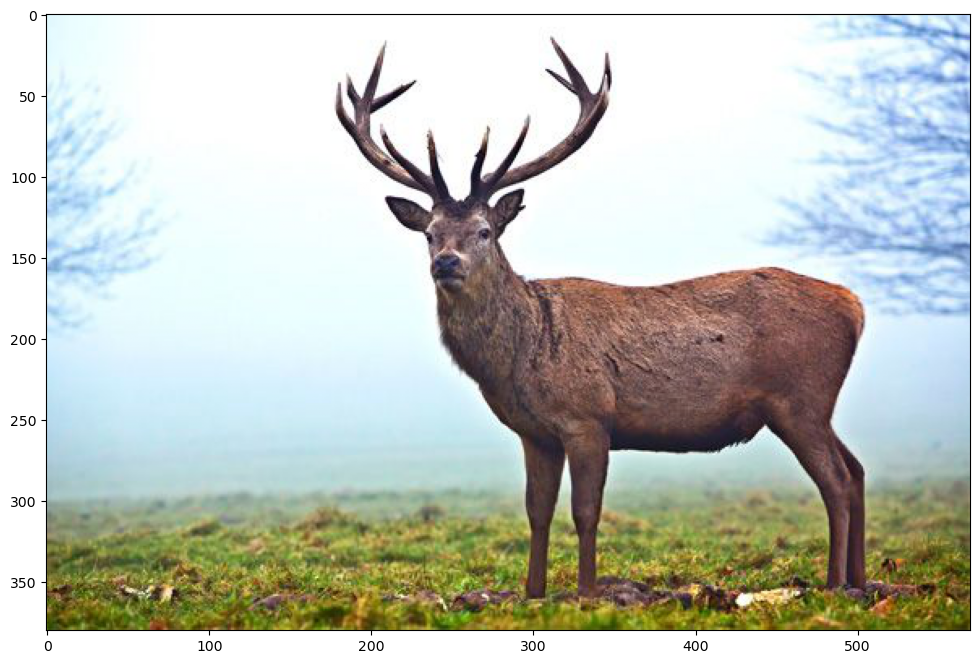

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = plt.imread('deer.jpg')/255.
plt.figure(figsize = (15,8))
plt.imshow(image)

## Print the shape of the above displayed Image

In [3]:
image.shape

(380, 570, 3)

In [4]:
# we see that image.shape has returned a numpy array of 3 elements
# lets store them in variables called height, width and channels
# the given image is 380 pixels in height
# the given image is 570 pixels in width
# the given image is has RGB colors
height, width, channels = image.shape

print(height)
print(width)
print(channels)

380
570
3


## Let's seperate all three channels as a 2-dim image (which shall get fed to GMM model)

In [5]:
# 1st channel
r = image[:,:,0]

#2nd channel
g = image[:,:,1]

## Consider variable b as the third channel. Now similar to above assign the third channel to variable b

In [6]:
#3rd channel
b = image[:,:,2]

## Let's fit a GMM model on all the three channels individually

## Import Gaussian Mixture function from python sklearn mixture module

In [7]:
from sklearn.mixture import GaussianMixture

## Train the GMM for reg, blue and green

In [16]:
# Let's consider two clusters for separating background from foreground
gmm_r = GaussianMixture(n_components=3, random_state=0).fit(r)
gmm_g = GaussianMixture(n_components=3, random_state=0).fit(g)
gmm_b = GaussianMixture(n_components=3, random_state=0).fit(b)

C:\Users\sudhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sudhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sudhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


## For Separating foreground with Background, take mean value of all gaussian means clusters as a threshold value, this acts as separation boundary here. 


In [17]:
threshold_r = np.mean(gmm_r.means_)
threshold_g = np.mean(gmm_g.means_)
threshold_b = np.mean(gmm_b.means_)

## Create a mask (A mask is a binary image consisting of zero- and non-zero values) of Foreground image for every channel and assign it to variables R, G, B respectively Hint : the channel values should be either less or more than threshold value

In [20]:
# Your Answer for Task #5 Here. Replace ? with correct code
# Write the code inplace of "?"
R = (r > threshold_r).astype(float)
G = (g > threshold_g).astype(float)
B = (b > threshold_b).astype(float)

##  Multiply the masks of each channel calculated above with the corresponding channel values (r,g,b) and save the respective 2-dim images as img_r, img_g, img_b

In [21]:
img_r = R * r
img_g = G * g
img_b = B * b

## Finally concatenate all the three channels as one 3-dim image and store it in variable 'img' Hint : Look for numpy concatenate function and use axis 2

In [22]:
# At first reshape all three 2-dim image to 3-dim image
img_r = img_r.reshape(img_r.shape[0], img_r.shape[1], 1)
img_g = img_g.reshape(img_g.shape[0], img_g.shape[1], 1)
img_b = img_b.reshape(img_b.shape[0], img_b.shape[1], 1)

# Fill the numpy function to use here for concatenating all three channels
img = np.dstack((img_r,img_g,img_b))

## Display the image with background removed

(380, 570, 3)


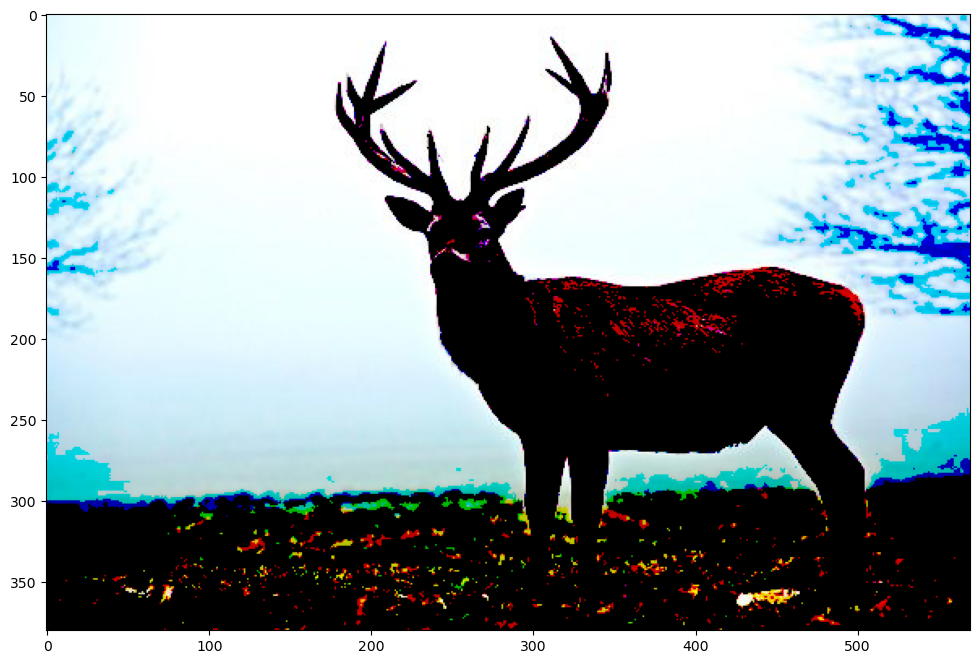

In [23]:
plt.figure(figsize = (15,8))
print(img.shape)
plt.imshow(img)

In [13]:
## The contrast reduced image is obtained!